**Ada Huang**

UIN: 426006283

CSCE 633 - 600

Homework 2

Feb 22, 2023

# 1 Least Absolute Deviation

Given $D = \{(x_n, y_n)\}, y = f(x)+\epsilon, f(x) = w^\intercal x$, and $p(\epsilon)=\frac{\lambda}{2}\exp(-\lambda|\epsilon|)$

The likelihood function is 
$$Pr(D|x) = \prod_{i=1}^n Pr(y_i|x_i)=\prod_{i=1}^n\frac{\lambda}{2}\exp(-\lambda |y_i-f(x_i)|)$$
The log likelihood is
\begin{align*}
    &  \log \prod_{i=1}^n Pr(y_i|x_i) \\
    & = \log(\prod_{i=1}^n\frac{\lambda}{2}\exp(-\lambda |y_i-f(x_i)|))\\
    & = \sum^n_{i=1}\log(\frac{\lambda}{2}\exp(-\lambda |y_i-f(x_i)|))\\
    & = \sum^n_{i=1}[\log(\frac{\lambda}{2})+\log(\exp(-\lambda|y_i-f(x_i)|))]\\
    & = \sum^n_{i=1}[C + (-\lambda|y_i-f(x_i)|)]\quad\dots C \text{ is a constant}
\end{align*}
The objective function for computing $w$ is 
    $$\max_w \sum^n_{i=1}[C + (-\lambda|y_i-w^\intercal x_i)|)]$$
This problem does not have a closed-form solution like Least Square Regression. Unlike Least Square Regression, our objective function is not convex, so we are unable to find a $w$ such that our objective function is maximized. 

# 2 Regression with Ambiguous Data

The data is generated by $y = f_w(\phi(x))+\epsilon$, $y \sim N(\mu, \sigma)$, assume the observed data $y_i$ is generated by a gaussian distribution and the noise $\epsilon$ follows a normal distribution. 

The probability of the observed data is $Pr(f_w(\phi(x_i)))$. 

The likelihood function is 
\begin{align*}
    & \prod_{i=1}^n Pr(f_w(\phi(x_i))|z_i, b_i)
\end{align*}
The log likelihood is
\begin{align*}
    & \log \prod_{i=1}^n Pr(f_w(\phi(i))|z_i, b_i)\\
    & = \log \prod_{i=1}^n((Pr(f_w\phi(x_i))|b_i = 1, z_i))^{b_i}\cdot ((Pr(f_w\phi(x_i))|b_i = 0, z_i))^{1-b_i}\\
    & = \log \prod_{i=1}^n((Pr(f_w(\phi(x_i))|y_i\geqslant z_i))^{b_i} \cdot (Pr(f_w(\phi(x_i))|y_i\leqslant z_i))^{1-b_i}\\
    & = \log \prod_{i=1}^n\bigg(\frac{Pr_Y(f_w(\phi(x_i)))}{1-F(z_i - f_w(\phi(x_i)))}\bigg)^{b_i}\cdot \bigg(\frac{Pr_Y(f_w(\phi(x_i)))}{F(z_i - f_w(\phi(x_i)))}\bigg)^{1-b_i}\\
    & = \log \prod_{i=1}^n\bigg( \frac{\frac{1}{\sqrt{2\pi}\sigma}e^-{\frac{(f_w(\phi(x_i))-\mu)^2}{2\sigma^2}}}{1-\int^{z_i - f_w(\phi(x_i))}_{-\infty}P(t)dt}\bigg)^{b_i}\cdot \bigg(\frac{\frac{1}{\sqrt{2\pi}\sigma}e^-{\frac{(f_w(\phi(x_i))-\mu)^2}{2\sigma^2}}}{\int^{z_i - f_w(\phi(x_i))}_{-\infty}P(t)dt}\bigg)^{1-b_i}\\
    & = \sum_{i=1}^n\bigg[\log\bigg( \frac{\frac{1}{\sqrt{2\pi}\sigma}e^-{\frac{(f_w(\phi(x_i))-\mu)^2}{2\sigma^2}}}{1-\int^{z_i - f_w(\phi(x_i))}_{-\infty}P(t)dt}\bigg)^{b_i}\cdot \bigg(\frac{\frac{1}{\sqrt{2\pi}\sigma}e^-{\frac{(f_w(\phi(x_i))-\mu)^2}{2\sigma^2}}}{\int^{z_i - f_w(\phi(x_i))}_{-\infty}P(t)dt}\bigg)^{1-b_i}\bigg]\\
    & = \sum_{i=1}^n \bigg[b_i\log\bigg(\frac{\frac{1}{\sqrt{2\pi}\sigma}e^-{\frac{(f_w(\phi(x_i))-\mu)^2}{2\sigma^2}}}{1-\int^{z_i - f_w(\phi(x_i))}_{-\infty}P(t)dt}\bigg) + \sum_{i=1}^n (1-b_i)\log\bigg(\frac{\frac{1}{\sqrt{2\pi}\sigma}e^-{\frac{(f_w(\phi(x_i))-\mu)^2}{2\sigma^2}}}{\int^{z_i - f_w(\phi(x_i))}_{-\infty}P(t)dt}\bigg)\bigg]\\
    & = \sum_{i=1}^n \bigg[b_i(\log \frac{1}{\sqrt{2\pi}\sigma} + \log e^-{\frac{(f_w(\phi(x_i))-\mu)^2}{2\sigma^2}} - \log(1-\int^{z_i - f_w(\phi(x_i))}_{-\infty}P(t)dt)) + (1-b_i)(\log \frac{1}{\sqrt{2\pi}\sigma} + \log e^-{\frac{(f_w(\phi(x_i))-\mu)^2}{2\sigma^2}} - \log(\int^{z_i - f_w(\phi(x_i))}_{-\infty}P(t)dt))\bigg]\\
    & = \sum_{i=1}^n \bigg[b_i(C + \frac{-(f_w(\phi(x_i))-\mu)^2}{2\sigma^2} - \log(1-\int^{z_i - f_w(\phi(x_i))}_{-\infty}\frac{1}{\sqrt{2\pi}}e^{-\frac{t^2}{2}}dt)) + (1-b_i)(C + \frac{-(f_w(\phi(x_i))-\mu)^2}{2\sigma^2} - \log(\int^{z_i - f_w(\phi(x_i))}_{-\infty}\frac{1}{\sqrt{2\pi}}e^{-\frac{t^2}{2}}dt))\bigg]\\
    & = \sum_{i=1}^n \bigg[b_i(C + \frac{-(f_w(\phi(x_i))-\mu)^2}{2\sigma^2} - \log(1-\frac{1}{\sqrt{2\pi}}\int^{z_i - f_w(\phi(x_i))}_{-\infty}e^{-\frac{t^2}{2}}dt)) + (1-b_i)(C + \frac{-(f_w(\phi(x_i))-\mu)^2}{2\sigma^2} - \log(\frac{1}{\sqrt{2\pi}}\int^{z_i - f_w(\phi(x_i))}_{-\infty}e^{-\frac{t^2}{2}}dt))\bigg]\\
    & = \sum_{i=1}^n \bigg[b_i(C + \frac{-(f_w(\phi(x_i))-\mu)^2}{2\sigma^2} - \log(1-\frac{1}{2}(1+erf(\frac{z_i - f_w(\phi(x_i))}{\sqrt{2}})))) + (1-b_i)(C + \frac{-(f_w(\phi(x_i))-\mu)^2}{2\sigma^2} - \log(\frac{1}{2}(1+erf(\frac{z_i - f_w(\phi(x_i))}{\sqrt{2}}))))\bigg]
\end{align*}

The objective function for computing $f_w(\phi(x_i))$ is
$$\max_{w} \sum_{i=1}^n \bigg[b_i(C + \frac{-(f_w(\phi(x_i))-\mu)^2}{2\sigma^2} - \log(1-\frac{1}{2}(1+erf(\frac{z_i - f_w(\phi(x_i))}{\sqrt{2}})))) + (1-b_i)(C + \frac{-(f_w(\phi(x_i))-\mu)^2}{2\sigma^2} - \log(\frac{1}{2}(1+erf(\frac{z_i - f_w(\phi(x_i))}{\sqrt{2}}))))\bigg]$$

# 3 Regularization Penalties Large Magnitudes of Parameters

By singular value decomposition, $\Phi = U\Sigma V^\intercal$, where $U\in \mathbb{R}^{M\times n}$ and $V\in\mathbb{R}^{n\times n}$ are orthonormal matrices satisfying $U^\intercal U = I$ and $V^\intercal V = I$, and $\Sigma = diag(\sigma_1, \dots, \sigma_n)$ is a diagonal matrix with $\sigma_i \geqslant 0, i = 1,\dots, n$.
\begin{align*}
    w_* & = (\lambda I + \Phi^\intercal \Phi)^{-1}\Phi^\intercal y\\
    & = (\lambda I + V\Sigma U^\intercal U\Sigma V^\intercal)^{-1}\Phi^\intercal y\\
    & = (\lambda I + V\Sigma^2 V^\intercal )^{-1} \Phi^\intercal y\\
    & = (V(\lambda I + \Sigma^2)V^\intercal )^{-1} \Phi^\intercal y\quad\dots\text{ from hw2}\\
    & = V(\lambda I + \Sigma^2)^{-1}V^\intercal \Phi^\intercal y
\end{align*}
Since $V^\intercal V = I$, so follow the hint we have,
    $$\|w_*\|_2 = \|(\lambda I + \Sigma^2)^{-1}V^\intercal \Phi^\intercal y\|_2$$
Let $V^\intercal \Phi^\intercal y = u$, then 
$$\|w_*\|_2^2 = \|(\lambda I + \Sigma^2)^{-1}u\|_2^2$$
Denote $u = (u_1, \dots, u_n)$, 
$$\|w_*\|_2^2 = \sum_{i=1}^n \bigg(\frac{u_i}{\lambda +\sigma_i^2}\bigg)^2$$
Thus, when $\lambda$ increases, the Euclidean norm of the optimal solution $\|w_*\|_2$ decreases. 


# 4 Ridge Regression and Lasso

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from scipy.sparse import csr_matrix
from sklearn.datasets import load_svmlight_file
from tqdm import tqdm
from sklearn.model_selection import KFold

In [2]:
# read E2006 train data
X, y = load_svmlight_file("E2006.train\E2006.train")

In [3]:
X.shape

(16087, 150360)

In [4]:
X = csr_matrix(X)

In [5]:
X.shape

(16087, 150360)

In [6]:
# number of training examples
n = X.shape[0]

In [7]:
# read E2006 test data
X_test, y_test = load_svmlight_file("E2006.test\E2006.test", n_features = X.shape[1])

In [8]:
X_test = csr_matrix(X_test)

In [9]:
# number of test examples
X_test.shape

(3308, 150360)

In [10]:
alpha_list =  [0, 1e-5, 1e-3,1e-2 , 0.1, 1, 10, 100, 1e3, 1e4, 1e5, 1e6]

## 1

**lasso**

In [24]:
lasso = linear_model.Lasso(alpha=(0.1/n))
lasso.fit(X, y)

Lasso(alpha=6.650704974727322e-07)

In [25]:
coef_lasso = lasso.coef_

In [26]:
# the number of non-zero coefficients
print("Number of non-zero coefficients: ", np.count_nonzero(coef_lasso))

Number of non-zero coefficients:  2822


**ridge regression**

In [7]:
ridge_reg = linear_model.Ridge(alpha=0.1)
ridge_reg.fit(X, y)

Ridge(alpha=0.1)

In [8]:
coef_ridge = ridge_reg.coef_

In [10]:
# the number of non-zero coefficients
print("Number of non-zero coefficients: ", np.count_nonzero(coef_ridge))

Number of non-zero coefficients:  150348


The number of nonzero coefficients in Lasso is 2,822, and in Ridge Regression is 150,348. The difference in the regularization penalty terms causes the different number of nonzero elements. Lasso regularization employs the L1-norm of the coefficients, which encourages them to be both small and sparse. The L1-norm penalty term leads to some coefficients being exactly zero, thus eliminating those features from the model. This is referred to as feature selection. In Ridge regression, the penalty term is the L2-norm of the coefficients, which encourages the coefficients to be small. This does not force them to be exactly zero, so the solution of Ridge regression has non-zero coefficients for all features, even if some of them only weakly correlate with the target variable.

The Lasso solution uses fewer features for predictions, making the model more interpretable and reducing the risk of overfitting. It also removes irrelevant features, improving model generalization. Lasso's sparsity has drawbacks: it is sensitive to outliers and highly correlated features, making it unstable and difficult to interpret. It is also less robust to small data changes, as zero coefficients can switch from zero to non-zero. The solution of Ridge Regression has non-zero coefficient for all features, even weakly related ones. This provides stability, less sensitive to outliers and correlated features. But interpretability is reduced as it includes weakly related features that don't contribute to prediction performance.

In our data, the total number of features is 150,360. Comparing the nonzero coefficients in Lasso (2,822) and Ridge Regression (150,348), we can see that Lasso leads to a large number of coefficients being zero, whereas Ridge regression only leads to a small number of zero coefficients. 

## 2

### i & ii

**lasso**

In [11]:
RMSE_lasso_train = []
RMSE_lasso_test = []
non_zero_coef = []
square_norm = []
alpha_list_lasso = [x/n for x in alpha_list]
for alpha in tqdm(alpha_list_lasso):
    lasso = linear_model.Lasso(alpha=alpha)
    lasso.fit(X, y)
    non_zero_coef.append(np.count_nonzero(lasso.coef_))
    square_norm.append(np.linalg.norm(lasso.coef_)**2)
    y_train_pred = lasso.predict(X)
    y_test_pred = lasso.predict(X_test)
    RMSE_lasso_train.append(np.sqrt(np.mean((y_train_pred - y)**2)))
    RMSE_lasso_test.append(np.sqrt(np.mean((y_test_pred - y_test)**2)))

  0%|          | 0/12 [00:00<?, ?it/s]C:\Users\adahx\AppData\Local\Temp\ipykernel_47464\838179512.py:8: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  lasso.fit(X, y)
  8%|▊         | 1/12 [09:25<1:43:40, 565.49s/it]d:\adahx\anaconda3\envs\geopandas\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:609: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.663031402540118, tolerance: 0.6431195173963549
  model = cd_fast.sparse_enet_coordinate_descent(
 17%|█▋        | 2/12 [47:21<4:21:55, 1571.51s/it]d:\adahx\anaconda3\envs\geopandas\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:609: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 269.9239058544324, tolerance: 0.6431195173963549
  model = cd_fast.sparse_enet_coordinate_descent(
100%|██████████| 12/12 [1:26:10

In [3]:
# plot the RMSE vs alpha, figsize = (10, 6)
plt.figure(figsize=(10, 6))
plt.plot(alpha_list_lasso, RMSE_lasso_train, label = "train")
plt.plot(alpha_list_lasso, RMSE_lasso_test, label = "test")
plt.xlabel("alpha")
plt.ylabel("RMSE")
plt.title("Lasso: RMSE vs alpha")
plt.legend()
plt.show()

NameError: name 'alpha_list_lasso' is not defined

<Figure size 720x432 with 0 Axes>

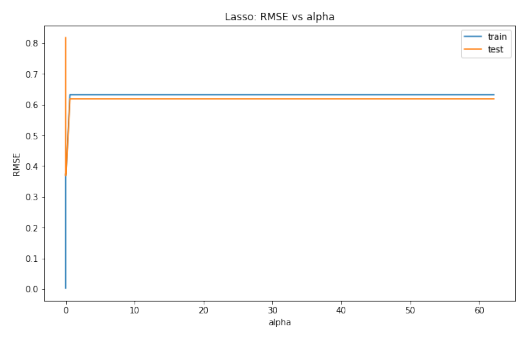

In [12]:
## note: I accidentally clicked rerun so the image disappeared, and I don't have time to retrain the model, so I just upload the image file I saved before.  
img = plt.imread("lasso_rmse.png")
plt.figure(figsize=(10, 6))
plt.imshow(img)
plt.axis("off")
plt.show()

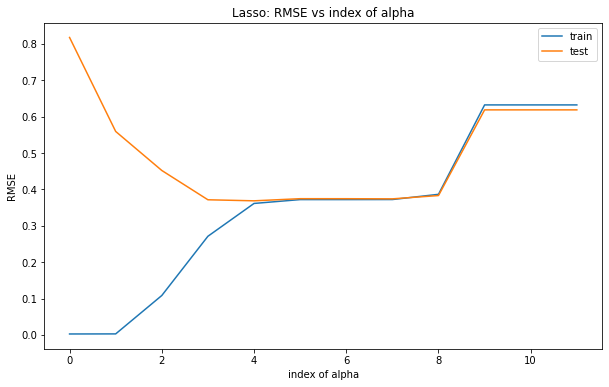

In [50]:
# plot using index of alpha, figsize = (10, 6)
plt.figure(figsize=(10, 6))
plt.plot(range(len(alpha_list_lasso)), RMSE_lasso_train, label = "train")
plt.plot(range(len(alpha_list_lasso)), RMSE_lasso_test, label = "test")
plt.xlabel("index of alpha")
plt.ylabel("RMSE")
plt.title("Lasso: RMSE vs index of alpha")
plt.legend()
plt.show()

In [14]:
RMSE_lasso_test

[0.817661289334369,
 0.5593447746383938,
 0.45206275884730746,
 0.37152207354607364,
 0.3686604842063661,
 0.37450981126682137,
 0.37445543272702997,
 0.37404420867135896,
 0.3831169403211038,
 0.618639780982641,
 0.618639780982641,
 0.618639780982641]

In [32]:
RMSE_lasso_train

[0.00264644869022136,
 0.002862137868351019,
 0.1083838038790292,
 0.2712147630403806,
 0.3614539385024552,
 0.3720207570717243,
 0.3720222216988522,
 0.3721686553040908,
 0.386531969313509,
 0.6322783539114604,
 0.6322783539114604,
 0.6322783539114604]

In [36]:
print('The minimum RMSE on test set is: ', min(RMSE_lasso_test), 'at lambda = ', alpha_list_lasso[RMSE_lasso_test.index(min(RMSE_lasso_test))]*n)

The minimum RMSE on test set is:  0.3686604842063661 at lambda =  0.1


**ridge regression**

In [37]:
RMSE_ridge_train = []
RMSE_ridge_test = []
non_zero_coef_ridge = []
square_norm_ridge = []
for alpha in tqdm(alpha_list):
    ridge_reg = linear_model.Ridge(alpha=alpha)
    ridge_reg.fit(X, y)
    non_zero_coef_ridge.append(np.count_nonzero(ridge_reg.coef_))
    square_norm_ridge.append(np.linalg.norm(ridge_reg.coef_)**2)
    y_train_pred = ridge_reg.predict(X)
    y_test_pred = ridge_reg.predict(X_test)
    RMSE_ridge_train.append(np.sqrt(np.mean((y_train_pred - y)**2)))
    RMSE_ridge_test.append(np.sqrt(np.mean((y_test_pred - y_test)**2)))

100%|██████████| 12/12 [06:16<00:00, 31.34s/it]  


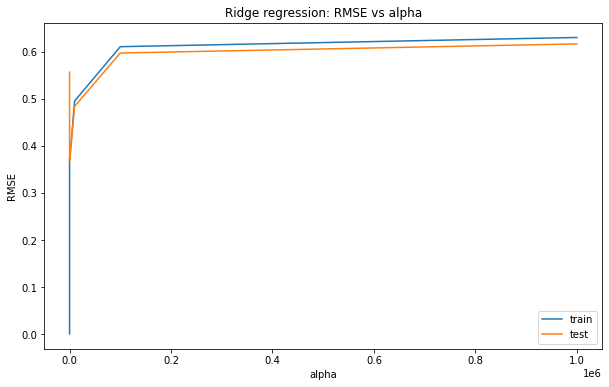

In [56]:
# plot the RMSE vs alpha, figsize = (10, 6)
plt.figure(figsize=(10, 6))
plt.plot(alpha_list, RMSE_ridge_train, label = "train")
plt.plot(alpha_list, RMSE_ridge_test, label = "test")
plt.xlabel("alpha")
plt.ylabel("RMSE")
plt.title("Ridge regression: RMSE vs alpha")
plt.legend()
plt.show()

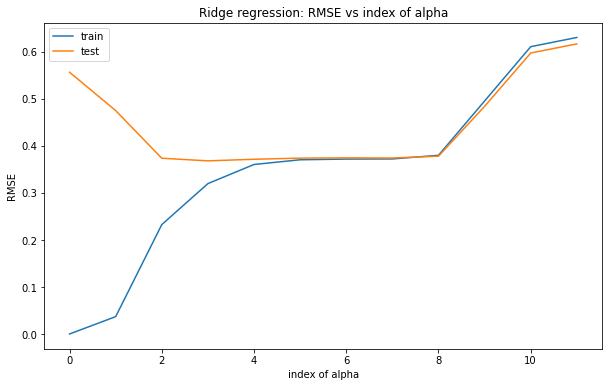

In [57]:
# plot using index of alpha, figsize = (10, 6)
plt.figure(figsize=(10, 6))
plt.plot(range(len(alpha_list)), RMSE_ridge_train, label = "train")
plt.plot(range(len(alpha_list)), RMSE_ridge_test, label = "test")
plt.xlabel("index of alpha")
plt.ylabel("RMSE")
plt.title("Ridge regression: RMSE vs index of alpha")
plt.legend()
plt.show()

In [40]:
RMSE_ridge_test

[0.5561474399074879,
 0.47473132676779517,
 0.37359673549456096,
 0.3680548811882252,
 0.3714183121302298,
 0.3738534517666169,
 0.37438087215688076,
 0.3740868614771107,
 0.37795894759338344,
 0.4838008250409739,
 0.5969434884289457,
 0.6163386259226783]

In [41]:
RMSE_ridge_train

[0.000595038846904363,
 0.037411097261646216,
 0.2327928638318171,
 0.31978002496496855,
 0.36035498424862256,
 0.3703347795236462,
 0.3718351227451071,
 0.3721071138052653,
 0.37988493619678293,
 0.49512972963720225,
 0.6103926604543833,
 0.6299591845823626]

In [42]:
print('The minimum RMSE on test set is: ', min(RMSE_ridge_test), 'at lambda = ', alpha_list[RMSE_ridge_test.index(min(RMSE_ridge_test))])

The minimum RMSE on test set is:  0.3680548811882252 at lambda =  0.01


The error curves of both ridge regression and lasso looks similar. After a certain point, the error curves of both ridge regression and lasso are almost flat. This is because the regularization penalty term is large enough to make the coefficients of the model very small, and the model is underfitting.Then the error curves of both of them start to increase. This is because the regularization penalty term is small enough to make the coefficients of the model large enough, and the model is overfitting.

### iii

**lasso**

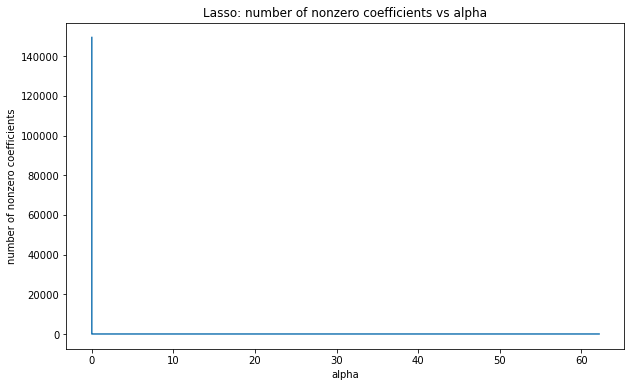

In [51]:
# plot the number of nonzero coefficients vs alpha, figsize = (10, 6)
plt.figure(figsize=(10, 6))
plt.plot(alpha_list_lasso, non_zero_coef)
plt.xlabel("alpha")
plt.ylabel("number of nonzero coefficients")
plt.title("Lasso: number of nonzero coefficients vs alpha")
plt.show()

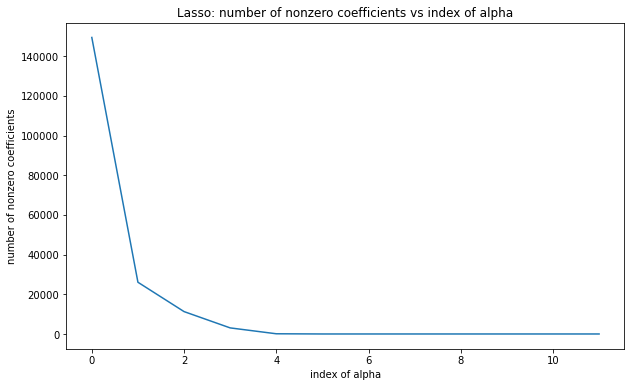

In [52]:
# plot using the index of alpha, figsize = (10, 6)
plt.figure(figsize=(10, 6))
plt.plot(range(len(alpha_list_lasso)), non_zero_coef)
plt.xlabel("index of alpha")
plt.ylabel("number of nonzero coefficients")
plt.title("Lasso: number of nonzero coefficients vs index of alpha")
plt.show()

**ridge regression**

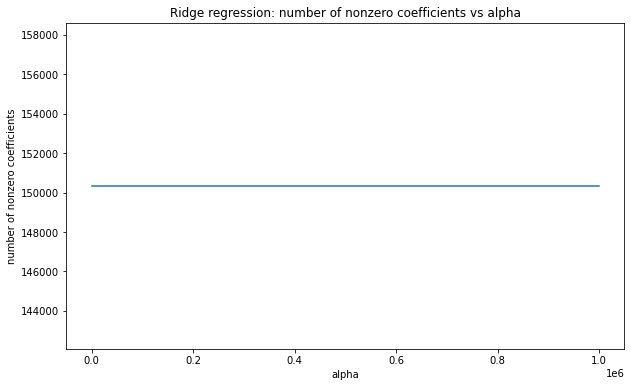

In [58]:
# plot the number of nonzero coefficients vs alpha, figsize = (10, 6)
plt.figure(figsize=(10, 6))
plt.plot(alpha_list, non_zero_coef_ridge)
plt.xlabel("alpha")
plt.ylabel("number of nonzero coefficients")
plt.title("Ridge regression: number of nonzero coefficients vs alpha")
plt.show()

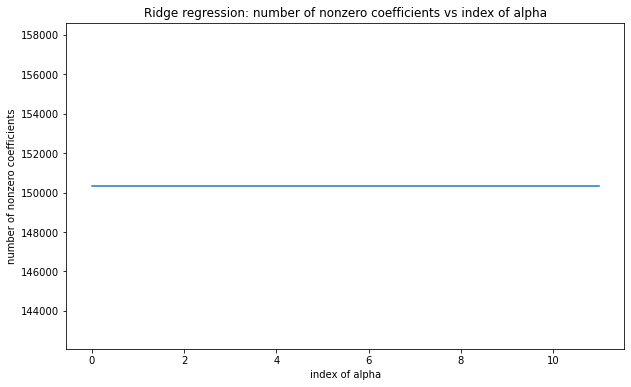

In [59]:
# plot using the index of alpha, figsize = (10, 6)
plt.figure(figsize=(10, 6))
plt.plot(range(len(alpha_list)), non_zero_coef_ridge)
plt.xlabel("index of alpha")
plt.ylabel("number of nonzero coefficients")
plt.title("Ridge regression: number of nonzero coefficients vs index of alpha")
plt.show()

As the $\lambda$ value increases in Lasso Regression, the number of non-zero coefficients decreases due to the penalty it imposes on the absolute values of the coefficients. This encourages the coefficients to be as small as possible while still allowing the model to fit the data. As the penalty becomes stronger, some coefficients are set to zero, resulting in a sparser model with fewer features.

Ridge Regression adds a penalty to the square of the coefficients, pushing them to be small without making any coefficients equal to zero. As $\lambda$ increases, the penalty gets stronger, making the coefficients smaller but still non-zero, resulting in a less sparse model.

### iv

**lasso**

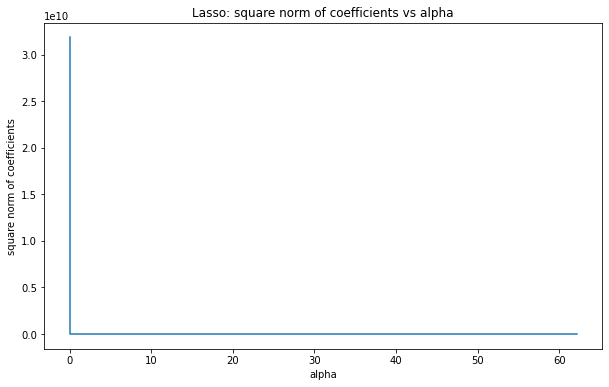

In [53]:
# plot the square norm of coefficients vs alpha, figsize = (10, 6)
plt.figure(figsize=(10, 6))
plt.plot(alpha_list_lasso, square_norm)
plt.xlabel("alpha")
plt.ylabel("square norm of coefficients")
plt.title("Lasso: square norm of coefficients vs alpha")
plt.show()

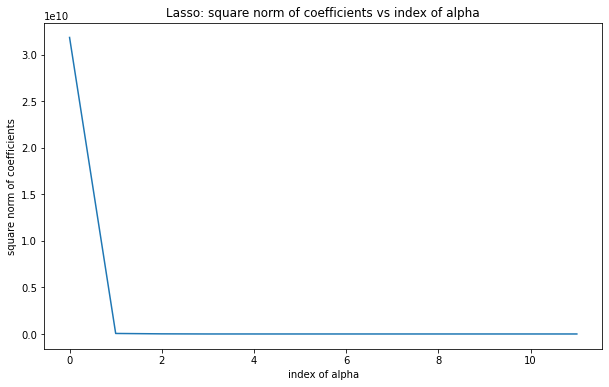

In [54]:
# plot using the index of alpha, figsize = (10, 6)
plt.figure(figsize=(10, 6))
plt.plot(range(len(alpha_list_lasso)), square_norm)
plt.xlabel("index of alpha")
plt.ylabel("square norm of coefficients")
plt.title("Lasso: square norm of coefficients vs index of alpha")
plt.show()

**ridge regression**

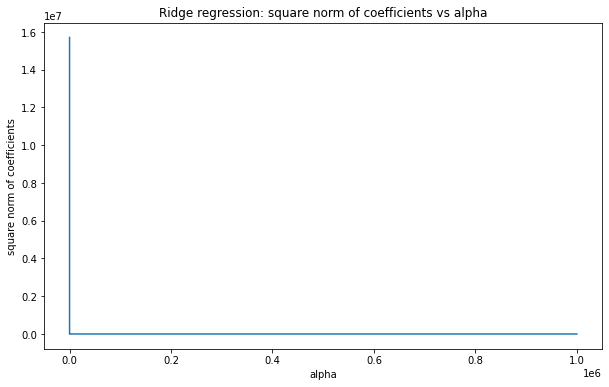

In [60]:
# plot the square norm of coefficients vs alpha, figsize = (10, 6)
plt.figure(figsize=(10, 6))
plt.plot(alpha_list, square_norm_ridge)
plt.xlabel("alpha")
plt.ylabel("square norm of coefficients")
plt.title("Ridge regression: square norm of coefficients vs alpha")
plt.show()

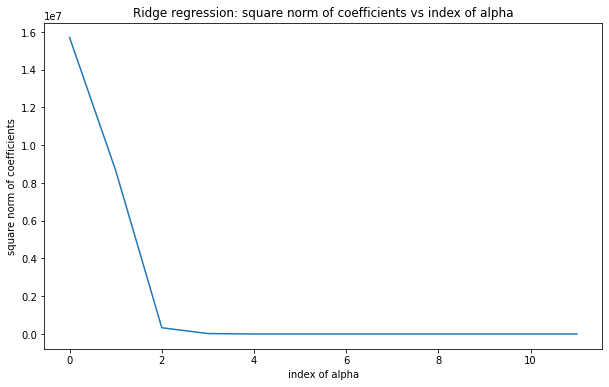

In [61]:
# plot using the index of alpha, figsize = (10, 6)
plt.figure(figsize=(10, 6))
plt.plot(range(len(alpha_list)), square_norm_ridge)
plt.xlabel("index of alpha")
plt.ylabel("square norm of coefficients")
plt.title("Ridge regression: square norm of coefficients vs index of alpha")
plt.show()

The square norm of the coefficients decreases as $\lambda$ increases in both Lasso and Ridge Regression. This is because the regularization term in the objective function penalizes large coefficients.

In Lasso, the regularization term is the sum of the absolute values of the coefficients multiplied by $\lambda$. In Ridge Regression, the regularization term is the sum of the squares of the coefficients multiplied by $\lambda$. As $\lambda$ increases, the regularization term becomes stronger, causing the coefficients to be smaller.

The overall objective function balances between fitting the training data well and keeping the coefficients small. An increase in $\lambda$ strengthens the regularization term, leading to smaller coefficients and a better trade-off between fitting the data well and having small coefficients. This is why the square norm of the coefficients decreases with the increase of $\lambda$.

## 3

**lasso**

In [77]:
# 5-fold cross validation for Lasso in the training data to find the best alpha
kf = KFold(n_splits=5, shuffle=True, random_state=0)
RMSE_lasso_train_cv = np.zeros((len(alpha_list_lasso),5))
for i, alpha in enumerate(tqdm(alpha_list_lasso)):
    for j, (train_index, test_index) in enumerate(tqdm(kf.split(X), leave = True)):
        X_train, X_test_cv = X[train_index], X[test_index]
        y_train, y_test_cv = y[train_index], y[test_index]
        lasso = linear_model.Lasso(alpha=alpha)
        lasso.fit(X_train, y_train)
        y_test_cv_pred = lasso.predict(X_test_cv)
        RMSE_lasso_train_cv[i,j] = np.sqrt(np.mean((y_test_cv_pred - y_test_cv)**2))

  0%|          | 0/12 [00:00<?, ?it/s]C:\Users\adahx\AppData\Local\Temp\ipykernel_47464\2994130266.py:9: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  lasso.fit(X_train, y_train)
C:\Users\adahx\AppData\Local\Temp\ipykernel_47464\2994130266.py:9: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  lasso.fit(X_train, y_train)
C:\Users\adahx\AppData\Local\Temp\ipykernel_47464\2994130266.py:9: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  lasso.fit(X_train, y_train)
C:\Users\adahx\AppData\Local\Temp\ipykernel_47464\2994130266.py:9: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  lasso.fit(X_train, y_train)
C:\Users\adahx\AppData\Local\Temp\ipykernel_47464\2994130266.py:9: UserWarning: With alpha=0, 

In [78]:
RMSE_lasso_train_cv

array([[1.10801696, 0.96043909, 1.08698781, 1.60500682, 1.16887651],
       [0.54153088, 0.55977438, 0.60876001, 0.65478355, 0.58454588],
       [0.56577208, 0.51868787, 0.48203898, 0.5681885 , 0.48231283],
       [0.39676648, 0.41694201, 0.38719145, 0.36718367, 0.40329676],
       [0.37128896, 0.37707863, 0.36772248, 0.35280708, 0.38178408],
       [0.36694626, 0.37685659, 0.37216133, 0.35614376, 0.38745892],
       [0.36697298, 0.37687381, 0.37215498, 0.35610342, 0.38745473],
       [0.36737448, 0.37716943, 0.37222574, 0.3559684 , 0.38753402],
       [0.38442729, 0.39216672, 0.38609635, 0.36914758, 0.40023436],
       [0.63650393, 0.63217431, 0.6329593 , 0.62570227, 0.63411834],
       [0.63650393, 0.63217431, 0.6329593 , 0.62570227, 0.63411834],
       [0.63650393, 0.63217431, 0.6329593 , 0.62570227, 0.63411834]])

In [79]:
# show the best value of alpha and the corresponding RMSE
print('The best value of alpha is: ', alpha_list_lasso[np.argmin(np.mean(RMSE_lasso_train_cv, axis=1))]*n, 'with RMSE: ', np.min(np.mean(RMSE_lasso_train_cv, axis=1)))

The best value of alpha is:  0.1 with RMSE:  0.37013624416632274


In [80]:
# train the model with the best alpha and compute the RMSE on the test set
lasso = linear_model.Lasso(alpha=alpha_list_lasso[np.argmin(np.mean(RMSE_lasso_train_cv, axis=1))])
lasso.fit(X, y)
y_test_pred = lasso.predict(X_test)
RMSE_lasso_test_cv = np.sqrt(np.mean((y_test_pred - y_test)**2))
print('The RMSE on the test set is: ', RMSE_lasso_test_cv)

The RMSE on the test set is:  0.3686604842063661


**ridge regression**

In [66]:
# 5-fold cross validation for Ridge in the training data to find the best alpha
kf = KFold(n_splits=5, shuffle=True, random_state=0)
RMSE_ridge_train_cv = np.zeros((len(alpha_list),5))
for i, alpha in enumerate(tqdm(alpha_list)):
    for j, (train_index, test_index) in enumerate(tqdm(kf.split(X), leave = True)):
        X_train, X_test_cv = X[train_index], X[test_index]
        y_train, y_test_cv = y[train_index], y[test_index]
        ridge_reg = linear_model.Ridge(alpha=alpha)
        ridge_reg.fit(X_train, y_train)
        y_test_cv_pred = ridge_reg.predict(X_test_cv)
        RMSE_ridge_train_cv[i, j] = np.sqrt(np.mean((y_test_cv_pred - y_test_cv)**2))

5it [11:10, 134.08s/it]00:00<?, ?it/s]
5it [01:47, 21.44s/it][11:10<2:02:54, 670.39s/it]
5it [00:14,  2.92s/it][12:57<56:31, 339.11s/it]  
5it [00:06,  1.24s/it][13:12<28:38, 190.93s/it]
5it [00:03,  1.38it/s][13:18<15:43, 117.99s/it]
5it [00:02,  1.84it/s][13:21<08:57, 76.75s/it] 
5it [00:02,  2.08it/s][13:24<05:09, 51.58s/it]
5it [00:02,  2.19it/s][13:27<02:57, 35.50s/it]
5it [00:02,  2.07it/s][13:29<01:39, 24.93s/it]
5it [00:02,  2.17it/s][13:31<00:53, 17.89s/it]
5it [00:02,  2.16it/s] [13:34<00:26, 13.08s/it]
5it [00:02,  2.21it/s] [13:36<00:09,  9.78s/it]
100%|██████████| 12/12 [13:38<00:00, 68.23s/it]


In [69]:
RMSE_ridge_train_cv

array([[0.55744018, 0.56424942, 0.54243712, 0.55488323, 0.52425835],
       [0.5067    , 0.50391153, 0.49004986, 0.47923638, 0.4826597 ],
       [0.38496321, 0.393968  , 0.38757704, 0.36898272, 0.38708906],
       [0.36495897, 0.37724587, 0.37074241, 0.35480593, 0.38046515],
       [0.36458621, 0.37506489, 0.37004588, 0.35399745, 0.3844905 ],
       [0.36644847, 0.3764162 , 0.37169471, 0.35572295, 0.38689612],
       [0.36691422, 0.37682036, 0.37210253, 0.35606981, 0.38738885],
       [0.36739767, 0.37718682, 0.37223249, 0.35596592, 0.38753883],
       [0.38082561, 0.3890023 , 0.38299761, 0.36603688, 0.39743809],
       [0.51498446, 0.5147825 , 0.51228194, 0.50088821, 0.51830459],
       [0.61862301, 0.61477668, 0.61514053, 0.60736735, 0.61688844],
       [0.63463134, 0.63035063, 0.63109256, 0.62378287, 0.63231148]])

In [70]:
# show the best value of alpha and the corresponding RMSE
print('The best value of alpha is: ', alpha_list[RMSE_ridge_train_cv.mean(axis=1).argmin()], 'with RMSE: ', RMSE_ridge_train_cv.mean(axis=1).min())

The best value of alpha is:  0.1 with RMSE:  0.3696369844824058


In [71]:
# train the model with the best alpha and compute the RMSE on the test set
ridge_reg = linear_model.Ridge(alpha=alpha_list[RMSE_ridge_train_cv.mean(axis=1).argmin()])
ridge_reg.fit(X, y)
y_test_pred = ridge_reg.predict(X_test)
print('The RMSE on the test set is: ', np.sqrt(np.mean((y_test_pred - y_test)**2)))

The RMSE on the test set is:  0.3714183121302298
